#Data Input

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
wqi_path='/content/drive/MyDrive/AQI_WQI_dataset/water_dataX.csv'
df = pd.read_csv(wqi_path, encoding='latin-1')

In [ ]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [ ]:
#conversions
#converting all non nuerical values to NaN
df['Temp']=pd.to_numeric(df['Temp'],errors='coerce')
df['D.O. (mg/l)']=pd.to_numeric(df['D.O. (mg/l)'],errors='coerce')
df['PH']=pd.to_numeric(df['PH'],errors='coerce')
df['B.O.D. (mg/l)']=pd.to_numeric(df['B.O.D. (mg/l)'],errors='coerce')
df['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
df['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
df['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
df['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(df['FECAL COLIFORM (MPN/100ml)'],errors='coerce')
df['year']=pd.to_numeric(df['year'],errors='coerce')
df.dtypes

,0
STATION CODE,object
LOCATIONS,object
STATE,object
Temp,float64
D.O. (mg/l),float64
PH,float64
CONDUCTIVITY (µmhos/cm),float64
B.O.D. (mg/l),float64
NITRATENAN N+ NITRITENANN (mg/l),float64
FECAL COLIFORM (MPN/100ml),float64


In [ ]:
df.drop(columns=['STATION CODE','LOCATIONS','STATE'],inplace=True)

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum()/len(df))*100
missing_df = pd.concat([missing_values,missing_percentage],axis=1)
missing_df.columns = ['Missing Values','Missing Percentage']
missing_df_sorted = missing_df.sort_values(by='Missing Percentage',ascending=False)
missing_df_sorted

,Missing Values,Missing Percentage
FECAL COLIFORM (MPN/100ml),316,15.871421
NITRATENAN N+ NITRITENANN (mg/l),225,11.300854
TOTAL COLIFORM (MPN/100ml)Mean,132,6.629834
Temp,92,4.620794
B.O.D. (mg/l),43,2.159719
D.O. (mg/l),31,1.557007
CONDUCTIVITY (µmhos/cm),25,1.255650
PH,8,0.401808
year,0,0.000000


In [ ]:
df.drop(columns=['FECAL COLIFORM (MPN/100ml)'],inplace=True)

In [ ]:
df.head()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,year
0,30.6,6.7,7.5,203.0,NaN,0.1,27.0,2014
1,29.8,5.7,7.2,189.0,2.0,0.2,8391.0,2014
2,29.5,6.3,6.9,179.0,1.7,0.1,5330.0,2014
3,29.7,5.8,6.9,64.0,3.8,0.5,8443.0,2014
4,29.5,5.8,7.3,83.0,1.9,0.4,5500.0,2014


In [ ]:
df = df.rename(columns={
    'Temp': 'temp',
    'D.O. (mg/l)': 'do',
    'PH': 'ph',
    'CONDUCTIVITY (µmhos/cm)': 'cond',
    'B.O.D. (mg/l)': 'bod',
    'NITRATENAN N+ NITRITENANN (mg/l)': 'nitrates',
    'TOTAL COLIFORM (MPN/100ml)Mean': 'total_coliform',
    'year': 'year'
})

In [ ]:
df.tail()

,temp,do,ph,cond,bod,nitrates,total_coliform,year
1986,NaN,7.9,738.0,7.2,2.7,0.518,202.0,2003
1987,29.0,7.5,585.0,6.3,2.6,0.155,315.0,2003
1988,28.0,7.6,98.0,6.2,1.2,NaN,570.0,2003
1989,28.0,7.7,91.0,6.5,1.3,NaN,562.0,2003
1990,29.0,7.6,110.0,5.7,1.1,NaN,546.0,2003


In [ ]:
df_filled_median = df.fillna(df.median())

In [ ]:
df = df.dropna()

#Calculation of score

In [ ]:
#calculation of temp
df['ts'] = df['temp'].apply(
    lambda x: 100 if (0 <= x <= 15) else
    (90 if (15 < x <= 20) else
     (80 if (20 < x <= 25) else
      (60 if (25 < x <= 30) else
       (40 if (30 < x <= 35) else 0)))))

In [ ]:
#calulation of Ph
df['npH'] = df['ph'].apply(lambda x: (100 if (8.5 >= x >= 7)
                                     else (80 if (8.6 >= x >= 8.5) or (6.9 >= x >= 6.8)
                                          else (60 if (8.8 >= x >= 8.6) or (6.8 >= x >= 6.7)
                                               else (40 if (9 >= x >= 8.8) or (6.7 >= x >= 6.5)
                                                    else 0)))))

In [ ]:
#calculation of dissolved oxygen
df['ndo']=df['do'].apply(lambda x:(100 if (x>=6)
                                 else(80 if  (6>=x>=5.1)
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3)
                                              else 0)))))

In [ ]:
#calculation of total coliform
df['nco']=df['total_coliform'].apply(lambda x:(100 if (5>=x>=0)
                                 else(80 if  (50>=x>=5)
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500)
                                              else 0)))))

In [ ]:
#calc of B.D.O
df['nbdo']=df['bod'].apply(lambda x:(100 if (3>=x>=0)
                                 else(80 if  (6>=x>=3)
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80)
                                              else 0)))))

In [ ]:
#calculation of electrical conductivity
df['nec']=df['cond'].apply(lambda x:(100 if (75>=x>=0)
                                 else(80 if  (150>=x>=75)
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225)
                                              else 0)))))

In [ ]:
#Calulation of nitrate
df['nna']=df['nitrates'].apply(lambda x:(100 if (20>=x>=0)
                                 else(80 if  (50>=x>=20)
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100)
                                              else 0)))))

In [ ]:
df['wts']=df.ts * 0.15
df['wph']=df.npH * 0.165
df['wdo']=df.ndo * 0.281
df['wbdo']=df.nbdo * 0.234
df['wec']=df.nec* 0.009
df['wna']=df.nna * 0.028
df['wco']=df.nco * 0.281
df['wqi']=(df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco)+df.wts
df

,temp,do,ph,cond,bod,nitrates,total_coliform,year,ts,npH,...,nec,nna,wts,wph,wdo,wbdo,wec,wna,wco,wqi
1,29.8,5.7,7.2,189.0,2.0,0.200,8391.0,2014,60,100,...,60,100,9.0,16.5,22.48,23.40,0.54,2.8,11.24,85.96
2,29.5,6.3,6.9,179.0,1.7,0.100,5330.0,2014,60,80,...,60,100,9.0,13.2,28.10,23.40,0.54,2.8,11.24,88.28
3,29.7,5.8,6.9,64.0,3.8,0.500,8443.0,2014,60,80,...,100,100,9.0,13.2,22.48,18.72,0.90,2.8,11.24,78.34
4,29.5,5.8,7.3,83.0,1.9,0.400,5500.0,2014,60,100,...,80,100,9.0,16.5,22.48,23.40,0.72,2.8,11.24,86.14
5,30.0,5.5,7.4,81.0,1.5,0.100,4049.0,2014,60,100,...,80,100,9.0,16.5,22.48,23.40,0.72,2.8,11.24,86.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,31.0,7.3,178.0,6.7,1.5,0.138,190.0,2003,40,0,...,100,100,6.0,0.0,28.10,23.40,0.90,2.8,16.86,78.06
1982,29.0,7.1,214.0,6.8,2.3,0.585,350.0,2003,60,0,...,100,100,9.0,0.0,28.10,23.40,0.90,2.8,16.86,81.06
1984,28.0,6.9,146.0,7.1,2.0,0.506,38.0,2003,60,0,...,100,100,9.0,0.0,28.10,23.40,0.90,2.8,22.48,86.68
1985,28.0,7.0,136.0,7.5,1.4,0.609,205.0,2003,60,0,...,100,100,9.0,0.0,28.10,23.40,0.90,2.8,16.86,81.06


In [ ]:
columns_to_drop = df.columns[df.columns.get_loc('ts'):df.columns.get_loc('wco') + 1]
df = df.drop(columns=columns_to_drop)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 1 to 1987
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            1599 non-null   float64
 1   do              1599 non-null   float64
 2   ph              1599 non-null   float64
 3   cond            1599 non-null   float64
 4   bod             1599 non-null   float64
 5   nitrates        1599 non-null   float64
 6   total_coliform  1599 non-null   float64
 7   year            1599 non-null   int64  
 8   wqi             1599 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 124.9 KB


#Correlation

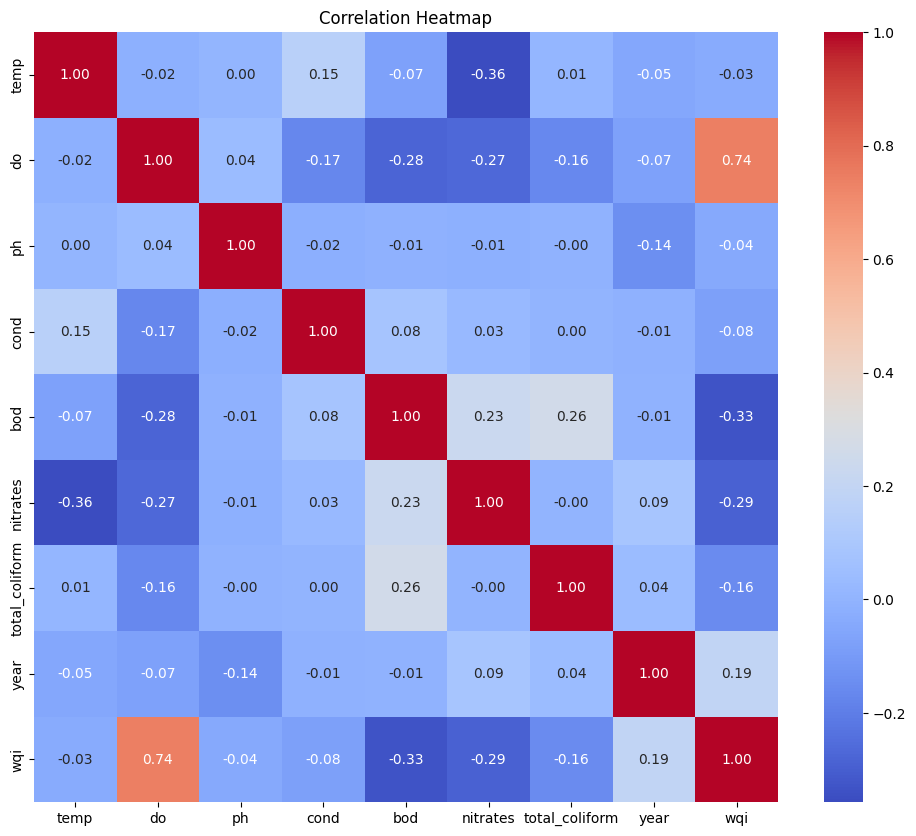

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.drop(columns=['year'],inplace=True)

#splitting


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 1 to 1987
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temp            1599 non-null   float64
 1   do              1599 non-null   float64
 2   ph              1599 non-null   float64
 3   cond            1599 non-null   float64
 4   bod             1599 non-null   float64
 5   nitrates        1599 non-null   float64
 6   total_coliform  1599 non-null   float64
 7   wqi             1599 non-null   float64
dtypes: float64(8)
memory usage: 112.4 KB


In [ ]:
X = df.iloc[:, :-1] #Independent features
y = df.iloc[:, -1] #Dependent feature

In [ ]:
# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Verify the shapes of the split datasets
print(f'Training set: {X_train.shape}, Test set: {X_test.shape}')

Training set: (1279, 7), Test set: (320, 7)


#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Coefficient of Determination (R^2) for train dataset: ", model.score(X_train, y_train))
print("Coefficient of Determination (R^2) for test dataset: ", model.score(X_test, y_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)
print('Intercept:', model.intercept_)
print('Slope:', model.coef_)

Coefficient of Determination (R^2) for train dataset:  0.5879194782899942
Coefficient of Determination (R^2) for test dataset:  0.5597468071441776
Mean Squared Error (MSE):  74.31433886709488
Intercept: 54.54782918223099
Slope: [-4.13469484e-01  6.84640875e+00 -7.86523276e-04  1.47708005e-04
 -7.02856549e-02 -6.60811298e-01 -1.26603314e-08]


#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
model = RandomForestRegressor(n_estimators = 200, random_state = 0)
model = model.fit(X_train, y_train)
prediction = model.predict(X_test)

mse = mean_squared_error(y_test,prediction)
print("Mean Squared Error (MSE): ", mse)
print("Coefficient of Determination (R^2) for train dataset: ", model.score(X_train, y_train))
print("Coefficient of Determination (R^2) for test dataset: ", model.score(X_test, y_test))

Mean Squared Error (MSE):  7.087873375249947
Coefficient of Determination (R^2) for train dataset:  0.9953792076471502
Coefficient of Determination (R^2) for test dataset:  0.9580100027587912


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Reduced parameter grid for faster tuning
n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=5)]  # Fewer values for n_estimators
max_features = [None, 'sqrt']  # Replaced 'auto' with None
max_depth = [int(x) for x in np.linspace(5, 20, num=3)]  # Narrower max_depth range
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]

# Parameter grid
params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

# Instantiate Random Forest
forest = RandomForestRegressor()

# RandomizedSearchCV with reduced iterations and fewer folds
search = RandomizedSearchCV(
    estimator=forest,
    param_distributions=params,
    scoring='neg_mean_squared_error',
    cv=3,  # Using 3-fold cross-validation
    n_iter=10,  # Only 10 candidates for faster tuning
    random_state=42,
    n_jobs=-1  # Utilize all cores for parallel processing
)

# Fitting the model
search.fit(X, y)

# Output best hyperparameters
print(f"Best Hyperparameters: {search.best_params_}")
print(f"Best Score (Negative MSE): {search.best_score_}")

Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 12}
Best Score (Negative MSE): -15.992272893036644


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Model 1: Using n_estimators=200 and random_state=100
forest_manual = RandomForestRegressor(n_estimators=200, random_state=0)
forest_manual.fit(X_train, y_train)
y_pred_manual = forest_manual.predict(X_test)
mse_manual = mean_squared_error(y_test, y_pred_manual)
print(f"MSE with n_estimators=200, random_state=100: {mse_manual}")

# Model 2: Using the best hyperparameters from RandomizedSearchCV
forest_tuned = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    max_depth=12,
    random_state=42  # Use a consistent random state for comparison
)
forest_tuned.fit(X_train, y_train)
y_pred_tuned = forest_tuned.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"MSE with tuned hyperparameters: {mse_tuned}")

MSE with n_estimators=200, random_state=100: 7.087873375249947
MSE with tuned hyperparameters: 7.145361648782954


In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(search.best_estimator_, 'random_forest_wqi_model.pkl')

['random_forest_wqi_model.pkl']